In [1]:
import json
from os import getcwd
from collections import Counter
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

In [2]:
path = getcwd() + "\\resources\\usagov_bitly_data.ly"

In [3]:
records = [json.loads(line) for line in open(path)]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Los_Angeles',
 'gr': 'CA',
 'g': '15r91',
 'h': '10OBm3W',
 'l': 'pontifier',
 'al': 'en-US',
 'hh': 'j.mp',
 'r': 'direct',
 'u': 'http://www.nsa.gov/',
 't': 1368832205,
 'hc': 1365701422,
 'cy': 'Anaheim',
 'll': [33.816101, -117.979401]}

In [5]:
timezones = [rec['tz'] for rec in records if 'tz' in rec]

In [6]:
timezones[:5]

['America/Los_Angeles', '', 'America/Phoenix', 'America/Chicago', '']

In [7]:
counts = Counter(timezones)
counts.most_common(10)

[('America/New_York', 903),
 ('America/Chicago', 686),
 ('', 636),
 ('America/Los_Angeles', 421),
 ('America/Puerto_Rico', 184),
 ('Asia/Tokyo', 102),
 ('America/Denver', 89),
 ('Europe/London', 85),
 ('America/Indianapolis', 50),
 ('America/Phoenix', 40)]

In [8]:
frame = DataFrame(records)

In [9]:
frame['tz'][:10]

0     America/Los_Angeles
1                        
2         America/Phoenix
3         America/Chicago
4                        
5    America/Indianapolis
6         America/Chicago
7                        
8           Australia/NSW
9                        
Name: tz, dtype: object

In [10]:
clean_tz = frame['tz'].fillna('Missing')

In [11]:
clean_tz[clean_tz == ''] = 'Unknown'

In [12]:
tz_counts = clean_tz.value_counts()
tz_counts['Missing']

120

<AxesSubplot:>

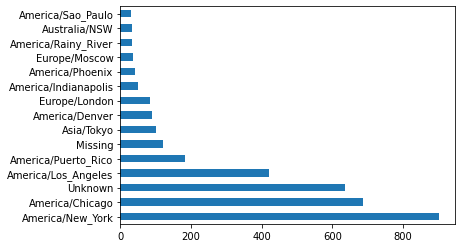

In [13]:
tz_counts[:15].plot(kind='barh',rot=0)

In [14]:
frame['a'][0]

'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30'

In [15]:
frame['a'][50]

'Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Mobile/10B329'

In [16]:
agents = Series([x.split()[0] for x in frame.a.dropna()])
agents[:15]

0     Mozilla/5.0
1     Mozilla/4.0
2     Mozilla/5.0
3     Mozilla/5.0
4      Opera/9.80
5     Mozilla/5.0
6     Mozilla/5.0
7     Mozilla/5.0
8     Mozilla/5.0
9     Mozilla/5.0
10    Mozilla/5.0
11    Mozilla/5.0
12    Mozilla/5.0
13    Mozilla/5.0
14    Mozilla/4.0
dtype: object

In [17]:
os_windows = np.where(frame[frame.a.notnull()]['a'].str.contains('Windows'),'Windows','Not Windows')
os_windows[:10]

array(['Not Windows', 'Windows', 'Windows', 'Not Windows', 'Not Windows',
       'Windows', 'Windows', 'Not Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [18]:
cframe = frame[frame.a.notnull()]

In [19]:
by_tz_os = cframe.groupby(['tz', os_windows])

In [20]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [21]:
agg_counts

,Not Windows,Windows
tz,,
,484.0,152.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,4.0,2.0
Africa/Gaborone,0.0,1.0
...,...,...
Europe/Warsaw,1.0,1.0
Europe/Zaporozhye,0.0,1.0
Europe/Zurich,4.0,1.0


In [22]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                   55
Africa/Cairo                      101
Africa/Casablanca                 100
Africa/Ceuta                       36
Africa/Gaborone                    97
Africa/Johannesburg                42
America/Anchorage                  43
America/Argentina/Buenos_Aires     44
America/Argentina/Catamarca        47
America/Argentina/Cordoba          50
dtype: int64

In [23]:
count_subset = agg_counts.take(indexer)[-10:]

In [24]:
count_subset

,Not Windows,Windows
tz,,
America/Phoenix,22.0,18.0
America/Indianapolis,29.0,21.0
Europe/London,62.0,23.0
America/Denver,41.0,48.0
Asia/Tokyo,88.0,14.0
America/Puerto_Rico,93.0,91.0
America/Los_Angeles,207.0,214.0
,484.0,152.0
America/Chicago,343.0,343.0


<AxesSubplot:ylabel='tz'>

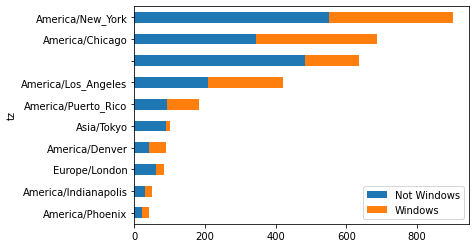

In [25]:
count_subset.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='tz'>

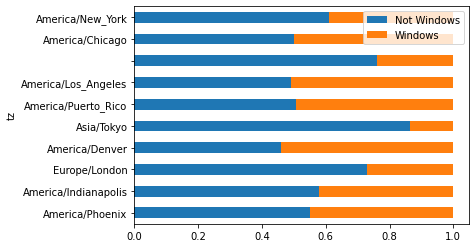

In [26]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

In [27]:
frame['tz']

0       America/Los_Angeles
1                          
2           America/Phoenix
3           America/Chicago
4                          
               ...         
3954        America/Chicago
3955        America/Chicago
3956             Asia/Tokyo
3957                       
3958    America/Puerto_Rico
Name: tz, Length: 3959, dtype: object

In [28]:
ctzframe = frame.tz[frame.tz != ''].dropna()

In [29]:
ctzframe

0        America/Los_Angeles
2            America/Phoenix
3            America/Chicago
5       America/Indianapolis
6            America/Chicago
                ...         
3952        America/New_York
3954         America/Chicago
3955         America/Chicago
3956              Asia/Tokyo
3958     America/Puerto_Rico
Name: tz, Length: 3203, dtype: object

In [30]:
countries_frame = Series([x.split('/')[0] for x in ctzframe])

<AxesSubplot:>

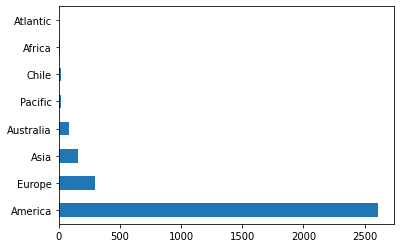

In [31]:
countries_frame.value_counts().plot(kind='barh')